In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib
import sklearn


### read and load the Data

In [65]:
train_data=pd.read_csv("train.csv")

In [66]:
test_data=pd.read_csv("test.csv")

In [67]:
y_test=pd.read_csv("gender_submission.csv")

### visualize the data

In [68]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train_data.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
test_data.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [70]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [71]:
train_data.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


#### Handeling null values

In [72]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64


In [73]:
train_data.ffill(inplace=True)
test_data.ffill(inplace=True)
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


#### Check for duplicated value

In [74]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())


0
0


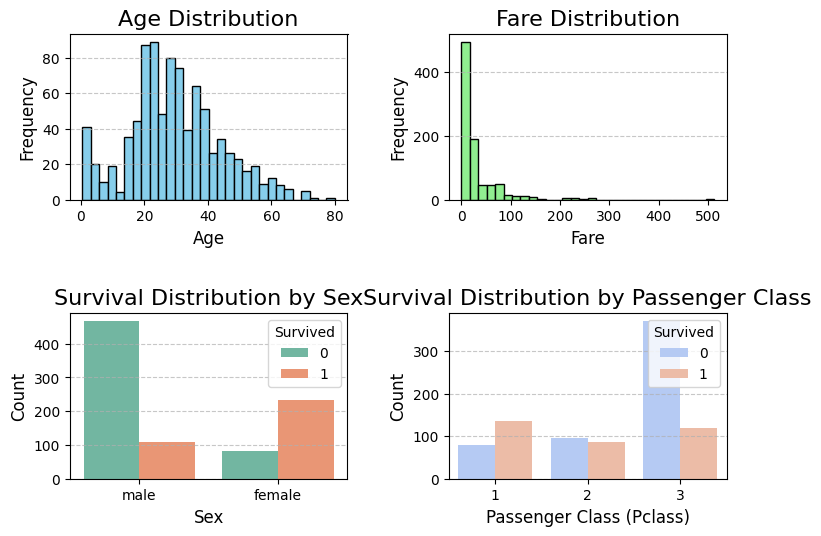

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots to arrange them closer together
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # 2 rows, 2 columns

# Plotting the Age distribution
axs[0, 0].hist(train_data['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution', fontsize=16)
axs[0, 0].set_xlabel('Age', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the Fare distribution
axs[0, 1].hist(train_data['Fare'], bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Fare Distribution', fontsize=16)
axs[0, 1].set_xlabel('Fare', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Survival distribution based on Sex
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Survival Distribution by Sex', fontsize=16)
axs[1, 0].set_xlabel('Sex', fontsize=12)
axs[1, 0].set_ylabel('Count', fontsize=12)
axs[1, 0].legend(title='Survived', loc='upper right')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting Passenger Class distribution
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Survival Distribution by Passenger Class', fontsize=16)
axs[1, 1].set_xlabel('Passenger Class (Pclass)', fontsize=12)
axs[1, 1].set_ylabel('Count', fontsize=12)
axs[1, 1].legend(title='Survived', loc='upper right')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make the plots closer
plt.tight_layout(pad=3.0)  # Adjust padding between plots
plt.show()


In [76]:
## remove the target column

y_train=train_data['Survived']
train_data.drop(['Survived'],axis=1,inplace=True)

#### Prepare ordinal encoder

In [77]:
s_train=train_data[['Sex']]
s_test=test_data[['Sex']]

In [78]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal=OrdinalEncoder()

# transform sex column from male&female to 0&1
train_data['encoder_sex']=ordinal.fit_transform(s_train)
test_data['encoder_sex']=ordinal.fit_transform(s_test)

# To drop the sex column
train_data.drop(['Sex'],axis=1,inplace=True)
test_data.drop(['Sex'],axis=1,inplace=True)


In [79]:
train_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,encoder_sex
0,1,3,22.0,1,0,7.2500,1.0
1,2,1,38.0,1,0,71.2833,0.0
2,3,3,26.0,0,0,7.9250,0.0
3,4,1,35.0,1,0,53.1000,0.0
4,5,3,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1.0
887,888,1,19.0,0,0,30.0000,0.0
888,889,3,19.0,1,2,23.4500,0.0
889,890,1,26.0,0,0,30.0000,1.0


#### Stadradization the data

In [80]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
train_data_std=std.fit_transform(train_data.values)
test_data_std=std.fit_transform(test_data.values)

### Building the modles

#### Logistic regression model

In [81]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

log.fit(train_data_std,y_train)
accuracy=log.score(train_data_std,y_train)
print("The accuracy =",accuracy*100)

The accuracy = 79.2368125701459


In [82]:
y_test.drop(['PassengerId'],axis=1,inplace=True)

In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

predict=log.predict(test_data_std)

accuracy=accuracy_score(y_test,predict)
precision=precision_score(y_test,predict)
recall=recall_score(y_test,predict)
f1=f1_score(y_test,predict)

print("Accuracy = ",accuracy)
print("precision = ",precision)
print("recall = ",recall)
print("f1 = ",f1)


Accuracy =  0.9425837320574163
precision =  0.9324324324324325
recall =  0.9078947368421053
f1 =  0.92


#### Decision tree model

In [84]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()

dec_tree.fit(train_data,y_train)

accuracy=dec_tree.score(train_data,y_train)
print("The accuracy = ",accuracy*100)

The accuracy =  100.0


In [92]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

predict=dec_tree.predict(test_data)

accuracy=accuracy_score(y_test,predict)
precision=precision_score(y_test,predict)
recall=recall_score(y_test,predict)
f1=f1_score(y_test,predict)

print("Accuracy = ",accuracy)
print("precision = ",precision)
print("recall = ",recall)
print("f1 = ",f1)


Accuracy =  0.777511961722488
precision =  0.672514619883041
recall =  0.756578947368421
f1 =  0.7120743034055728


In [86]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dec_tree,train_data,y_train,scoring='accuracy',cv=10)
print(scores)

[0.44444444 0.76404494 0.71910112 0.61797753 0.79775281 0.64044944
 0.80898876 0.65168539 0.85393258 0.69662921]


#### Building random forset model

In [87]:
from sklearn.ensemble import RandomForestClassifier

random=RandomForestClassifier()
random.fit(train_data,y_train)

accuracy_random=random.score(train_data,y_train)
print("The accuracy = ",accuracy_random*100)

The accuracy =  100.0


In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

predict=random.predict(test_data)

accuracy=accuracy_score(y_test,predict)
precision=precision_score(y_test,predict)
recall=recall_score(y_test,predict)
f1=f1_score(y_test,predict)

print("Accuracy = ",accuracy)
print("precision = ",precision)
print("recall = ",recall)
print("f1 = ",f1)


Accuracy =  0.8014354066985646
precision =  0.7804878048780488
recall =  0.631578947368421
f1 =  0.6981818181818182


In [91]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(random,train_data,y_train,scoring='accuracy',cv=10)
print(scores)

[0.77777778 0.82022472 0.74157303 0.79775281 0.87640449 0.84269663
 0.83146067 0.78651685 0.88764045 0.80898876]
